In [1]:
import preprocessing, os, gzip
from config import FOLLOWER_DATA_DIR
import graph_tool.all as gt
from tqdm import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
campaigns = preprocessing.load_campaign()

In [3]:
hashtag = 'jharkhandwithmodi'
tweets = campaigns[hashtag]

In [4]:
followers_dict = {}
for tweet in tqdm(tweets.values()):
    user = tweet['username']
    file_name = os.path.join(FOLLOWER_DATA_DIR, user + '.gz')
    if os.path.isfile(file_name):
        f = gzip.open(file_name, 'rb')
        followers = [x.split('\t')[1] for x in f.read().decode().strip().split('\n')]
        followers_dict[user] = set(followers)
    else:
        followers_dict[user] = None

100%|██████████| 13908/13908 [07:40<00:00, 30.19it/s] 


In [7]:
list(tweets.values())[:10]

[{'username': 'bjp4latehar',
  'id': '1172033856607682560',
  'retweet_from': '',
  'template': '',
  'retweet_id': '',
  'text': 'आधारभूत संरचना हो या शिक्षा या फिर स्वच्छता या जल शक्ति अभियान, झारखण्ड के जिले लगातार सबसे ऊंचे पायदान पर अपनी उपस्थिति दर्ज करवा रहे हैं। #jharkhandwithmodi',
  'date': datetime.datetime(2019, 9, 12, 6, 27, 1),
  'retweets': 0,
  'favorites': 0},
 {'username': 'vjay21788',
  'id': '1172108207499558912',
  'retweet_from': 'ommathur_bjp',
  'template': '',
  'retweet_id': '1172063209785741312',
  'text': 'rt @ommathur_bjp: #bharatmatakijai भारत माता की जय।सबको जाेहार।जनमानस का झारखंडी लहजे में अभिवादन करते हुए प्रधानमंत्री नरेंद्र मोदी ने रांची के प्रभात तारा मैदान में अपना संबोधन दिया;झारखंड को मिला नया विधानसभा भवन।पीएम मोदी ने किसानों-दुकानदारों के लिए शुरू की पेंशन योजनाएं #jharkhandwithmodi 🙏 https://t.co/6j3mrzy81m',
  'date': datetime.datetime(2019, 9, 12, 11, 22, 28),
  'retweets': 140,
  'favorites': 0},
 {'username': 'vagrawa3',
  'id': '109706975

In [20]:
rt_results, new_tweet_results = {}, {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[child['username']]
        if followers is None:
            followers = set()
        if sorted_tweets[j]['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
            else:
                n_norm += 1
    if child['retweet_id'] != '': 
        rt_results[child['username']] = (n_temp, n_norm)
    else:
        new_tweet_results[child['username']] = (n_temp, n_norm)

100%|██████████| 13908/13908 [00:29<00:00, 475.62it/s] 


In [21]:
rt_temps, rt_norms = zip(*list(rt_results.values()))

In [22]:
new_tweet_temps, new_tweet_norms = zip(*list(new_tweet_results.values()))

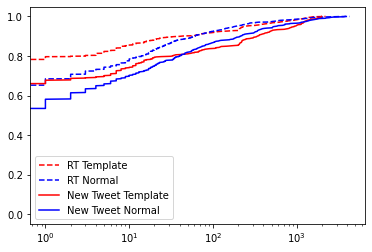

In [23]:
lists = [rt_temps, rt_norms, new_tweet_temps, new_tweet_norms]
labels = ["RT Template", "RT Normal", "New Tweet Template", "New Tweet Normal"]
styles = ['r--', 'b--', 'r', 'b']
for x, lab, sty in zip(lists, labels, styles):
    ecdf = ECDF(x)
    plt.plot(ecdf.x, ecdf.y, sty, label=lab)
plt.xscale('log')
plt.legend()

In [24]:
rt_all = [x+y for x,y in zip(rt_temps, rt_norms)]
nt_all = [x+y for x,y in zip(new_tweet_temps, new_tweet_norms)]

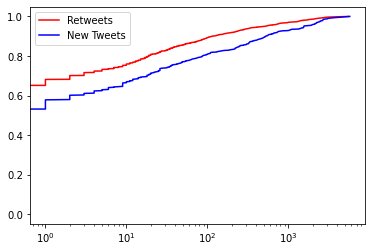

In [25]:
lists = [rt_all, nt_all]
labels = ["Retweets", "New Tweets"]
styles = ['r', 'b']
for x, lab, sty in zip(lists, labels, styles):
    ecdf = ECDF(x)
    plt.plot(ecdf.x, ecdf.y, sty, label=lab)
plt.xscale('log')
plt.legend()

# Follow up
So, new tweets require more exposure. Exposure to non template tweets increases participation at a faster rate (solid blue crosses solid red)

RTs are lower effort, should be higher. And yet, 